# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Week:** 2

**Date:** 20FEB2022

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenyingwuwy
* Nathan Fragar
* Sean Williams

## 1. Load Dataset

**[1.1]** Task: Import required packages: Pandas, Numpy, joblib

In [984]:
# Task: Import the pandas, numpy and joblib package
import pandas as pd
import numpy as np
import joblib as job

**[1.2]** Task: Change working directory to /home/jovyan/work

In [985]:
cd /home/jovyan/work

/home/jovyan/work


**[1.3]** Task: Load Processed Data

In [986]:
from src.data.sets import load_sets

In [987]:
load_sets(path='data/processed/', val=False)

(array([[0.35245902, 0.1212976 , 0.13173653, ..., 0.42888889, 0.29393939,
         0.44692737],
        [0.18032787, 0.04231312, 0.03592814, ..., 0.20888889, 0.43636364,
         0.17504655],
        [0.45081967, 0.09026798, 0.08982036, ..., 0.39111111, 0.20606061,
         0.46927374],
        ...,
        [0.43442623, 0.14527504, 0.08682635, ..., 0.23555556, 0.21515152,
         0.33333333],
        [0.45901639, 0.09590973, 0.06586826, ..., 0.30444444, 0.3030303 ,
         0.33705773],
        [0.6557377 , 0.29337094, 0.37724551, ..., 0.43777778, 0.44242424,
         0.36312849]]),
 array([1, 0, 1, ..., 1, 0, 1]),
 array([[0.30327869, 0.12834979, 0.10179641, ..., 0.36888889, 0.19090909,
         0.45996276],
        [0.45081967, 0.25246827, 0.08682635, ..., 0.07555556, 0.12121212,
         0.25698324],
        [0.41803279, 0.07898449, 0.0508982 , ..., 0.25777778, 0.18181818,
         0.37243948],
        ...,
        [0.63114754, 0.42877292, 0.3742515 , ..., 0.28666667, 0.26666667,
 

## 3. Create Baseline Model

**[3.1]** Task: Find the mode of the target variable and print it's value

In [988]:
y_mode = y_train.mode()
y_mode

0    1
Name: TARGET_5Yrs, dtype: int64

**[3.2]** Task: Create a numpy array called y_base filled with this value

In [989]:
y_shape = (len(y_train), 1)
y_base = np.full(y_shape, y_mode)

**[3.3]** Task: Import the accuracy score from sklearn

In [990]:
from src.models.performance import print_reg_perf

**[3.4]** Task: Display the accuracy score of this baseline model

In [991]:
print_reg_perf(y_train, y_base, set_name="Baseline")

Accuracy      Baseline: 0.83359375
RMSE          Baseline: 0.407929221802018
MAE           Baseline: 0.16640625
Precision     Baseline: 1.0
Recall        Baseline: 0.83359375
F1            Baseline: 0.9092458457605455


In [992]:
len(X_train.columns)

25

The null accuracy is 83.35%
If we predict 1, we'll be correct 83.35% of the time

## 4. Random Forest - Hyperparameter Tuning with Grid Search and KFold

Train Random Forest Algorithm

1.   Use Grid Search to tune Hyper Parameters
2.   Use KFold with 5 Splits
3.   Fit Algorithm

**[4.1]** Task: Import GridSearchCV, KFold from sklearn.model_selection

In [993]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

**[4.2]** Create a dictionary containing the Randomized Grid Search Parameters

In [994]:
# Linear Regression Random Grid Parameters
# Class Weight
class_weight = ['balanced']
# Penalty
penalty = ['none','l2','l1','elasticnet']
# Solver
solver = ['liblinear','lbfgs']
# max_iter
max_iter = [500]

random_grid = {'class_weight': class_weight,
               'penalty':penalty,
               'solver':solver,
               'max_iter':max_iter
               }



In [995]:
random_grid

{'class_weight': ['balanced'],
 'penalty': ['none', 'l2', 'l1', 'elasticnet'],
 'solver': ['liblinear', 'lbfgs'],
 'max_iter': [500]}

**[4.3]** Task: Create RF Model, and use Randomized Search to find GridSearch range

In [996]:
 from sklearn.linear_model import LogisticRegression as LR

In [997]:
lr_base = LR()
lr_random = RandomizedSearchCV(estimator = lr_base,
                               param_distributions = random_grid,
                               n_iter = 50, 
                               cv = 5,
                               verbose=2,
                               random_state=8, 
                               n_jobs = 4)

**[4.4]** Train Model

In [998]:
# Import Beep
from src.indicator.sounds import beep_when_done

In [999]:
lr_random.fit(X_train, y_train)

# Beep when completed
#beep_when_done()

print(lr_random.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced'}


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is not

"print(lr_random.best_params_)"

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced'}

In [1000]:
lr_best = LR(solver='lbfgs', penalty='l2', max_iter=500, class_weight='balanced').fit(X_train, y_train)

In [1001]:
print("--- Accuracy Scores Best Fit Model ---")
print_reg_perf(y_train, y_base,                   set_name="Baseline")
print_reg_perf(lr_best.predict(X_train), y_train, set_name="Train   ")
print_reg_perf(lr_best.predict(X_val), y_val,     set_name="Validate")

--- Accuracy Scores Best Fit Model ---
Accuracy      Baseline: 0.83359375
RMSE          Baseline: 0.407929221802018
MAE           Baseline: 0.16640625
Precision     Baseline: 1.0
Recall        Baseline: 0.83359375
F1            Baseline: 0.9092458457605455
Accuracy      Train   : 0.64609375
RMSE          Train   : 0.5949002017145396
MAE           Train   : 0.35390625
Precision     Train   : 0.9028871391076115
Recall        Train   : 0.6447985004686035
F1            Train   : 0.7523236741388737
Accuracy      Validate: 0.650625
RMSE          Validate: 0.5910795208768445
MAE           Validate: 0.349375
Precision     Validate: 0.9049111807732497
Recall        Validate: 0.6491754122938531
F1            Validate: 0.7560017459624618


**Observation** Training Model is overfitting

**[4.5]** Tune Hyperparameters to better reduce overfitting.

1. Reduce Depth to and 
2. increase min samples per leaf to 10

In [1002]:
lr_best_1 = LR(solver='lbfgs', penalty='none', max_iter=1000, class_weight='balanced').fit(X_train, y_train)

In [1003]:
print("--- Accuracy Scores Best Fit Model ---")
print_reg_perf(y_train, y_base,                     set_name="Baseline")
print_reg_perf(lr_best_1.predict(X_train), y_train, set_name="Train   ")
print_reg_perf(lr_best_1.predict(X_val), y_val,     set_name="Validate")

--- Accuracy Scores Best Fit Model ---
Accuracy      Baseline: 0.83359375
RMSE          Baseline: 0.407929221802018
MAE           Baseline: 0.16640625
Precision     Baseline: 1.0
Recall        Baseline: 0.83359375
F1            Baseline: 0.9092458457605455
Accuracy      Train   : 0.64609375
RMSE          Train   : 0.5949002017145396
MAE           Train   : 0.35390625
Precision     Train   : 0.9022536687631028
Recall        Train   : 0.6453608247422681
F1            Train   : 0.7524860670964922
Accuracy      Validate: 0.646875
RMSE          Validate: 0.5942432162002357
MAE           Validate: 0.353125
Precision     Validate: 0.9017763845350052
Recall        Validate: 0.6469265367316341
F1            Validate: 0.7533828022697511


**Observations**
* Validation Dataset is not performing well for the model, indicating Model is overfitting on Train Dataset

**[4.6]** Task: Plot Confusion Matrix

Identify how well the model is performing at predicting the outcome

In [1004]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


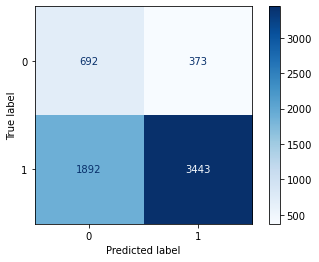

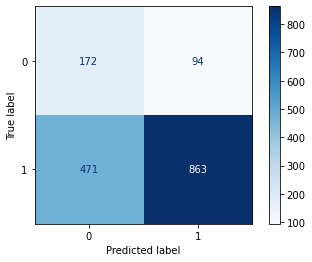

In [1005]:
# Plot confusion matrix (with numbers)
plot_confusion_matrix(lr_best_1, X_train, y_train, cmap=plt.cm.Blues)
plot_confusion_matrix(lr_best_1, X_val, y_val, cmap=plt.cm.Blues)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


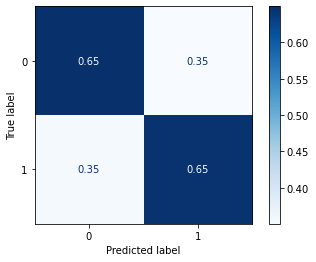

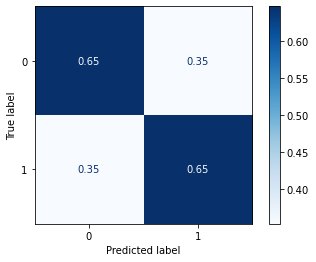

In [1006]:
# Plot confusion matrix (with ratios)
plot_confusion_matrix(lr_best_1, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plot_confusion_matrix(lr_best_1, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

**Observation** Both Models is predicting alot of False Positives (FP) in both training and validation datasets

**[4.7]** Task: Calculate AUROC

In [1007]:
from sklearn.metrics import roc_auc_score

In [1008]:
lr_best_1_y_train_proba = lr_best_1.predict_proba(X_train)[:, 1]
lr_best_1_y_val_proba = lr_best_1.predict_proba(X_val)[:, 1]
print("rf_best_1_proba:", lr_best_1_y_train_proba)

rf_best_1_proba: [0.50769309 0.09525316 0.63490077 ... 0.5190231  0.46045494 0.75111358]


In [1009]:
roc_auc_score(y_train, lr_best_1_y_train_proba)

0.7096284171759706

In [1010]:
roc_auc_score(y_val, lr_best_1_y_val_proba)

0.6967146126185028

**Observations** 
* Training Dataset has a AUROC prediction 0.709
* Validation Dataset has a poor AUROC prediction 0.696. This indicates the model is fitting reasonably well on unseen data
* The finaly Kaggle result AUROC 0.71136 - Best Personal Result

## 5. Plot AUC

In [1011]:
from sklearn.metrics import roc_curve

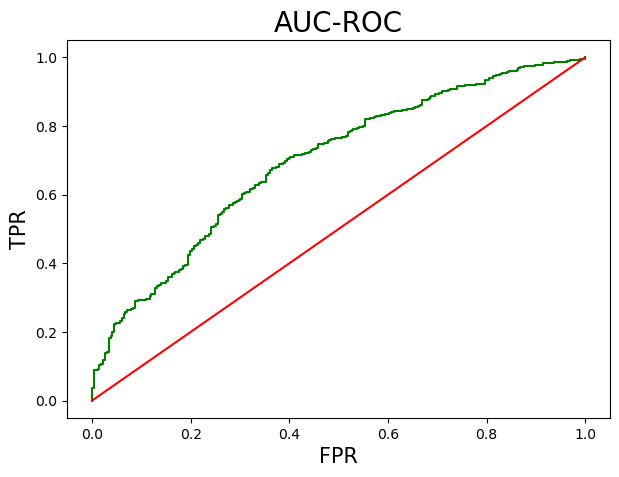

0.6967146126185028

In [1012]:
fpr,tpr,threshold=roc_curve(y_val,lr_best_1_y_val_proba)
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_val,lr_best_1_y_val_proba)

## 6. Logistic Regression - Kaggle Competition Preparation

**[6.1]** Prepare Kaggle Input File using rf_best Random Forest Model

In [1013]:
# File URLs
file_path_test= "data/processed/test.csv"

# Load files into df_training and df_validation data frames
df_test = pd.read_csv(file_path_test)

In [1014]:

# Drop Target and ID for X, and create target from y
X_test_id = df_test['Id']
X_test = df_test.drop(['Id'], axis=1)

**[6.2]** Check Test Dataset is ready for predicting

In [1015]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GP         3799 non-null   float64
 1   MIN        3799 non-null   float64
 2   PTS        3799 non-null   float64
 3   FGM        3799 non-null   float64
 4   FGA        3799 non-null   float64
 5   FG%        3799 non-null   float64
 6   3P Made    3799 non-null   float64
 7   3PA        3799 non-null   float64
 8   3P%        3799 non-null   float64
 9   FTM        3799 non-null   float64
 10  FTA        3799 non-null   float64
 11  FT%        3799 non-null   float64
 12  OREB       3799 non-null   float64
 13  DREB       3799 non-null   float64
 14  REB        3799 non-null   float64
 15  AST        3799 non-null   float64
 16  STL        3799 non-null   float64
 17  BLK        3799 non-null   float64
 18  TOV        3799 non-null   float64
 19  FG_Missed  3799 non-null   float64
 20  3P_Misse

**[6.3]** Create y Prediction using the Test Dataset

In [1016]:
y_predict = lr_best_1.predict_proba(X_test)

In [1017]:
print(y_predict)

[[0.58331672 0.41668328]
 [0.63965861 0.36034139]
 [0.30665059 0.69334941]
 ...
 [0.64861817 0.35138183]
 [0.19148764 0.80851236]
 [0.65377891 0.34622109]]


In [1018]:
print(y_predict[:,1])

[0.41668328 0.36034139 0.69334941 ... 0.35138183 0.80851236 0.34622109]


**[6.4]** Convert the Numpy Array into a Pandas Dataframe with a Column Name TARGET_5Yrs

In [1019]:
# Convert numpy arrany y_predict values back to df_train_cleaned_scaled data frame 
y_predict = pd.DataFrame(y_predict[:,1], columns = ['TARGET_5Yrs'])

**[6.5]** Concatenate Player ID and Prediction into on Data Frame and Sort by Id

In [1020]:
y_predict = pd.concat([X_test_id, y_predict], axis=1)

In [1021]:
y_predict = y_predict.sort_values(by=['Id'])

In [1022]:
print(y_predict)

         Id  TARGET_5Yrs
0         1     0.416683
2         3     0.693349
5         6     0.620670
8        14     0.460817
10       17     0.504137
...     ...          ...
3057  13770     0.720387
3058  13771     0.426266
3059  13774     0.452307
3063  13787     0.426515
3064  13792     0.494427

[3799 rows x 2 columns]


**[6.6]** Export Dataframe to CSV and save model

In [1023]:
y_predict.to_csv("data/external/submission_nfragar_20220220_linear_regression_w2_1.csv", index = False)
y_predict.shape

(3799, 2)

[CV] END class_weight=balanced, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END class_weight=balanced, max_iter=500, penalty=none, solver=lbfgs; total time=   0.4s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   1.4s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=elasticnet